In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Covid Data.csv")
print("Shape of df :",df.shape)
df.head()

Shape of df : (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [4]:
df.isna().sum().sum()

0

In [5]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


In [6]:
df.DATE_DIED.value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [7]:
df.PNEUMONIA.value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [8]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [9]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

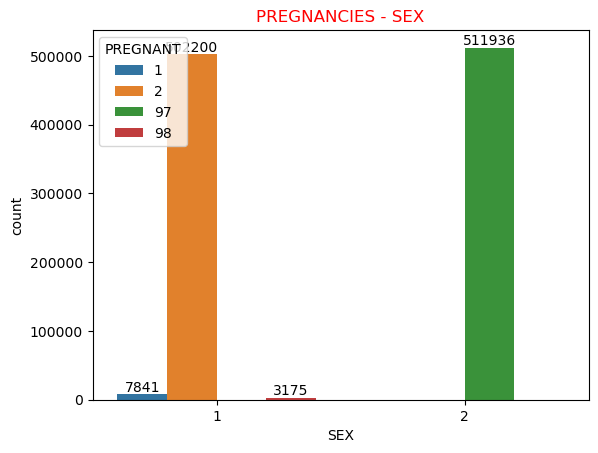

In [10]:
plt.figure()
ax = sns.countplot(df.SEX, hue = df.PREGNANT)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("PREGNANCIES - SEX",color="red");

In [11]:
df.PREGNANT = df.PREGNANT.replace(97,2)
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]

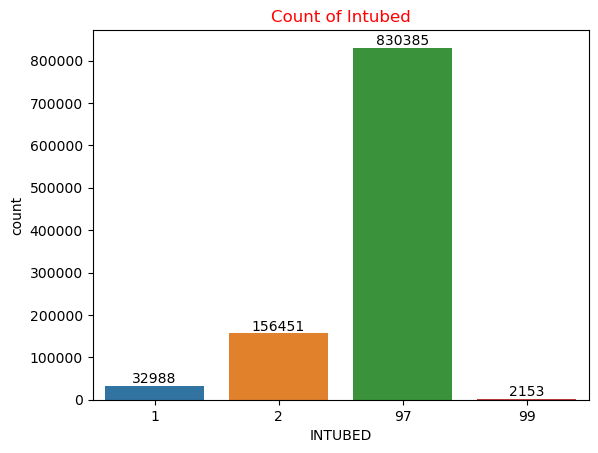

In [12]:
ax = sns.countplot(df.INTUBED)
plt.bar_label(ax.containers[0])
plt.title("Count of Intubed",color="red");

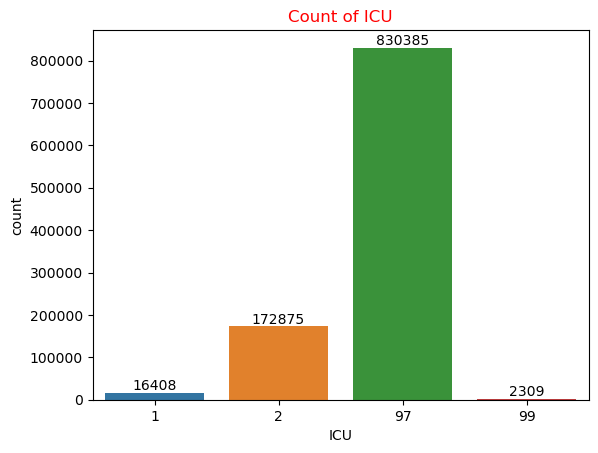

In [13]:
ax = sns.countplot(df.ICU)
plt.bar_label(ax.containers[0])
plt.title("Count of ICU",color="red");

In [14]:
df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

In [15]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


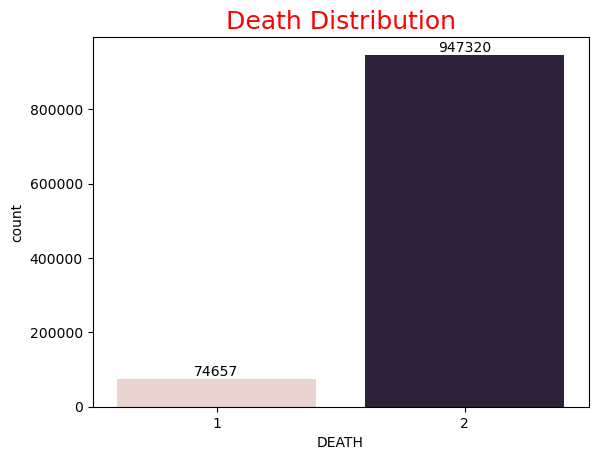

In [16]:
ax = sns.countplot(df.DEATH,palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");

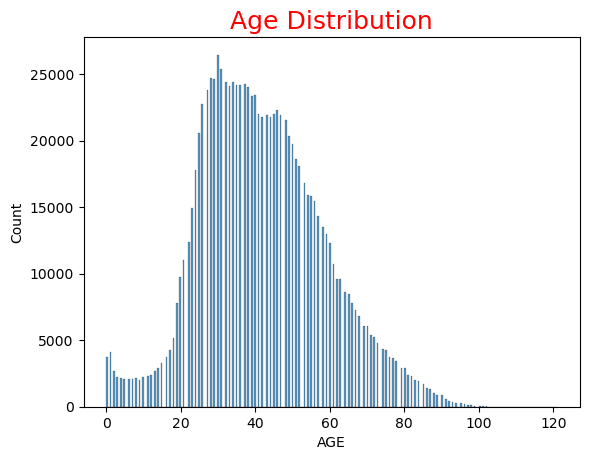

In [17]:
sns.histplot(x=df.AGE)
plt.title("Age Distribution", color="red", fontsize=18);

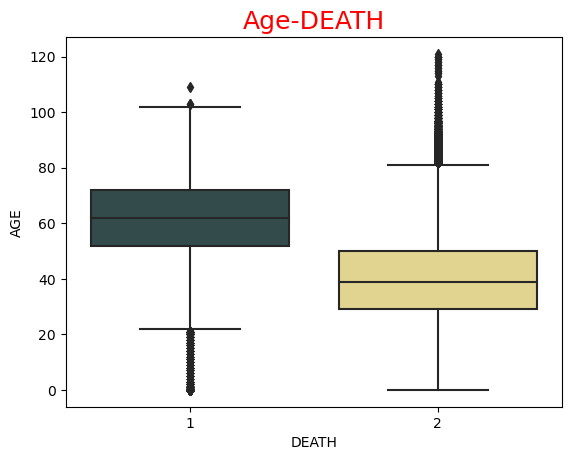

In [18]:
sns.boxplot(x="DEATH", y="AGE",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-DEATH",fontsize=18, color="red");

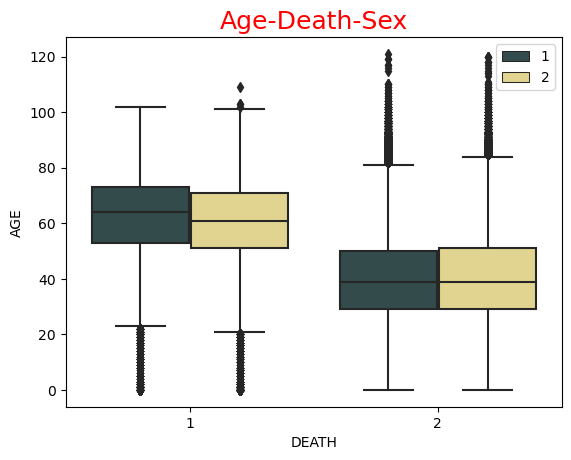

In [19]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=df,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18, color="red")
plt.legend(loc="best");

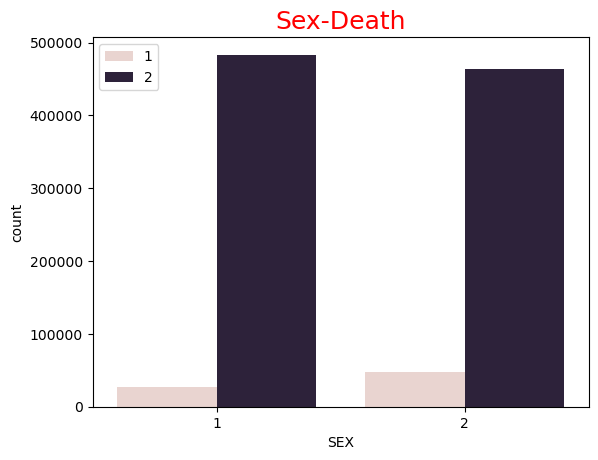

In [20]:
sns.countplot(df.SEX,hue=df.DEATH, palette=sns.cubehelix_palette(2))
plt.title("Sex-Death",fontsize=18, color="red")
plt.legend(loc="best");

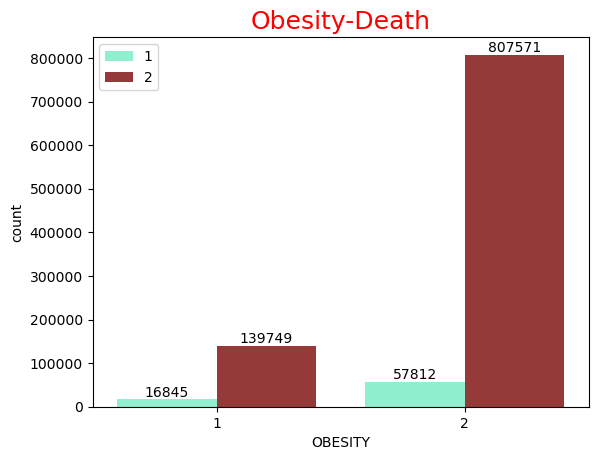

In [21]:
ax=sns.countplot(df.OBESITY,hue=df.DEATH, palette=sns.color_palette(["#7fffd4","#a52a2a"]))
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

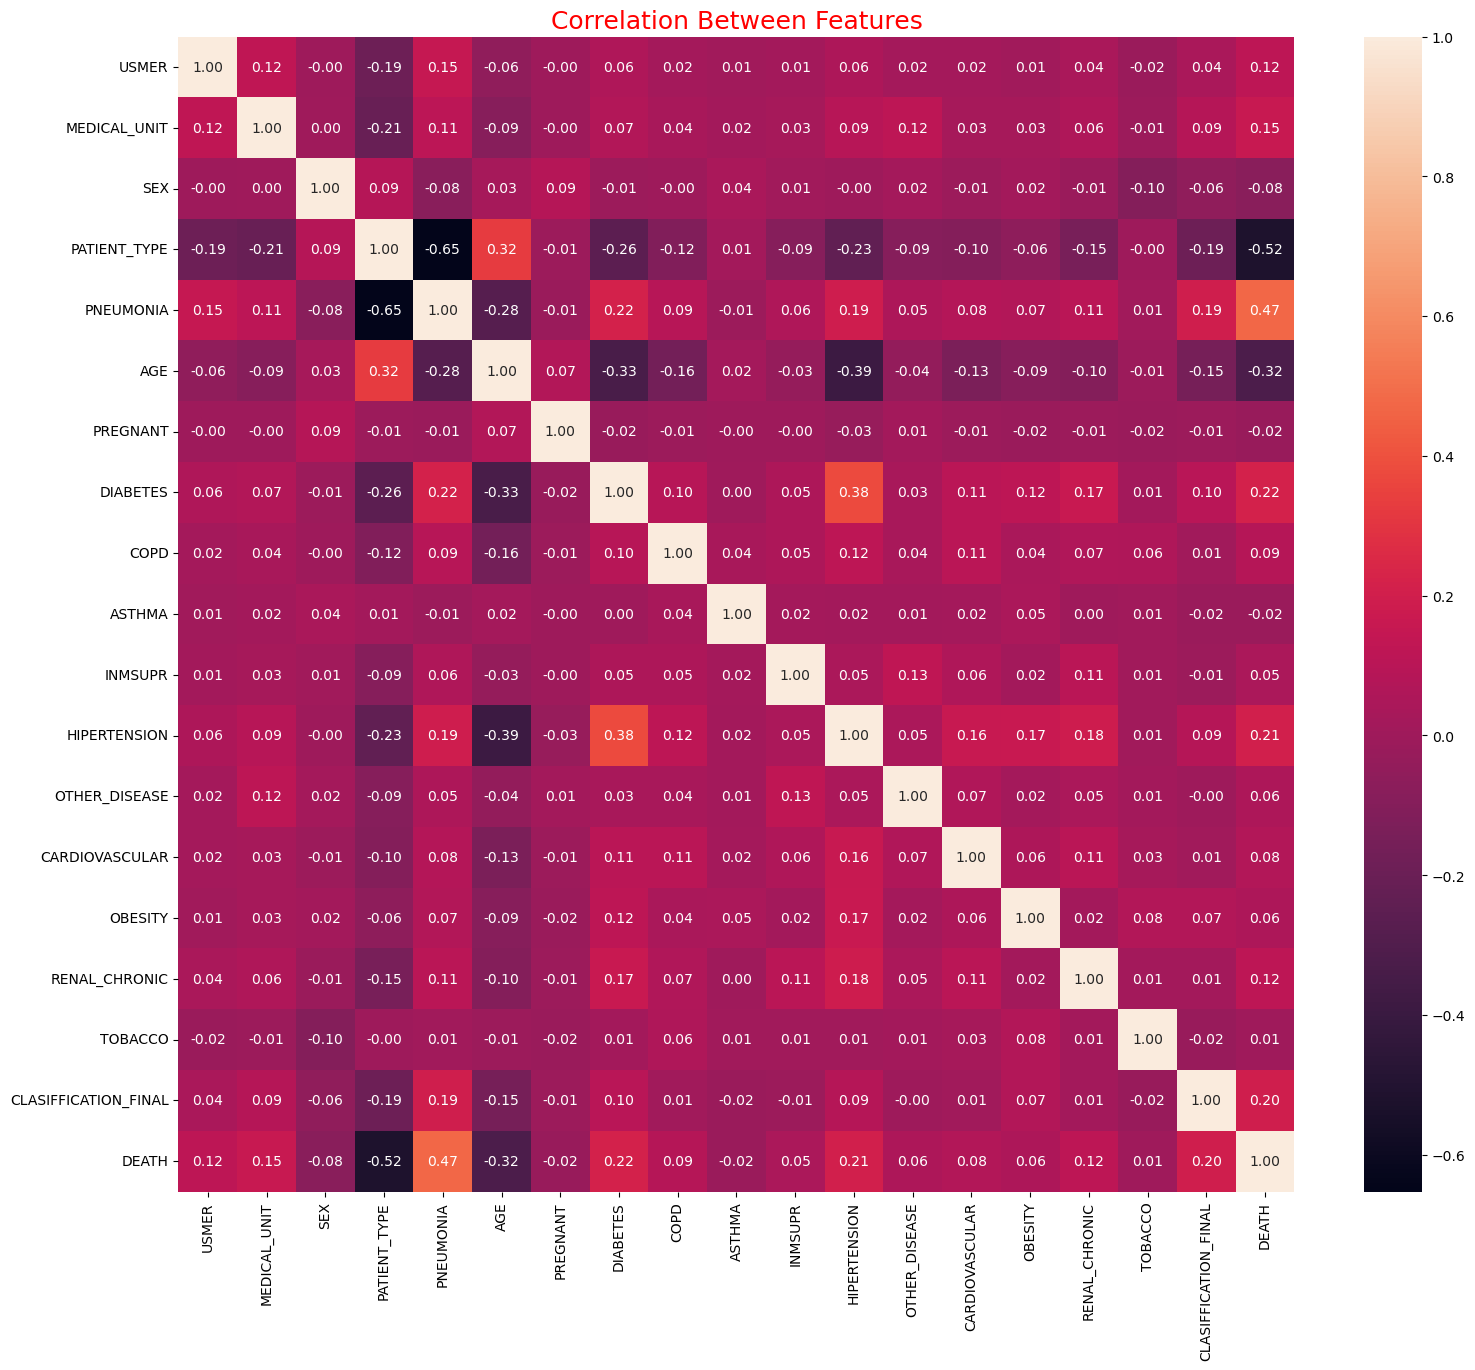

In [22]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f")
plt.title("Correlation Between Features",fontsize=18,color="red");

In [23]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

In [24]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [25]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1,1))

In [27]:
x = df.drop(columns="DEATH")
y = df["DEATH"]

In [28]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (817581, 25)
Test_x : (204396, 25)
Train_y : (817581,)
Test_y : (204396,)


In [29]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9394508698800368


In [30]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score :",f1_score(test_y,logreg.predict(test_x),average=None))

Logistic Regression F1 Score : [0.51993794 0.9676877 ]


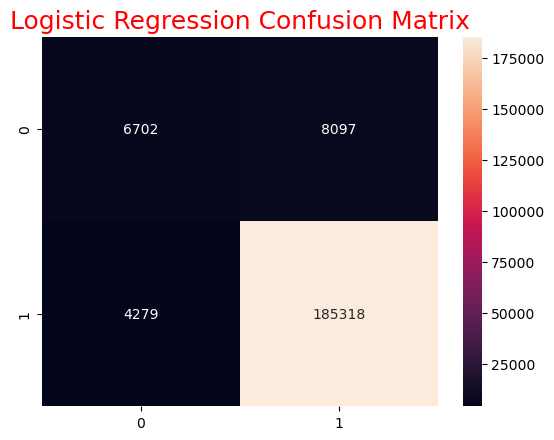

In [31]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red");

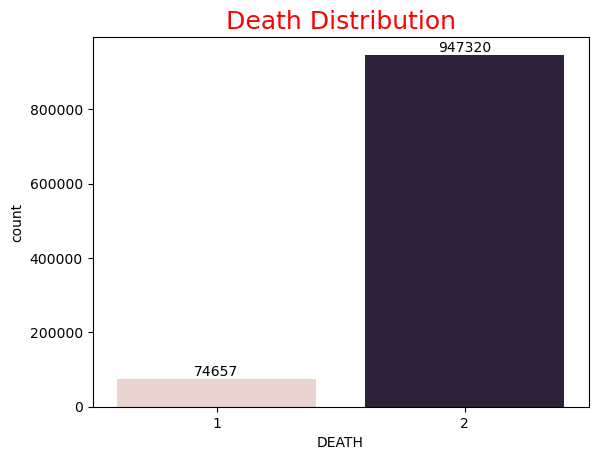

In [32]:
ax = sns.countplot(df.DEATH, palette=sns.cubehelix_palette(2))
plt.bar_label(ax.containers[0])
plt.title("Death Distribution", fontsize=18,color="red");